## question 1 starts 

In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import seaborn as sns
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.model_selection import train_test_split # for data partition.
from sklearn.metrics import r2_score # to identify r_squared for regression model.
from sklearn.linear_model import LinearRegression # for linear regression model.
from pandas.plotting import scatter_matrix, parallel_coordinates

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import preprocessing
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


%matplotlib inline 


In [2]:
#load the dataset
universalbank_df = pd.read_csv('UniversalBank.csv')
universalbank_df.head(9)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0


In [3]:
universalbank_df.shape

(5000, 14)

In [4]:
#print the column names
universalbank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
#rename columns with spaces
universalbank_df.columns = [s.strip().replace(' ', '_') for s in universalbank_df.columns]
universalbank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
#Identify the categorical variables and convert the data type
universalbank_df['Securities_Account'] = universalbank_df['Securities_Account'].astype('category')
universalbank_df['CD_Account'] = universalbank_df['CD_Account'].astype('category')
universalbank_df['Online'] = universalbank_df['Online'].astype('category')
universalbank_df['CreditCard'] = universalbank_df['CreditCard'].astype('category')
universalbank_df['Personal_Loan'] = universalbank_df['Personal_Loan'].astype('category')
print(universalbank_df.Personal_Loan.cat.categories)
print(universalbank_df.Securities_Account.cat.categories)
print(universalbank_df.CD_Account.cat.categories)
print(universalbank_df.Online.cat.categories)
print(universalbank_df.CreditCard.cat.categories)

Int64Index([0, 1], dtype='int64')
Int64Index([0, 1], dtype='int64')
Int64Index([0, 1], dtype='int64')
Int64Index([0, 1], dtype='int64')
Int64Index([0, 1], dtype='int64')


In [7]:
#information of the dataset
universalbank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIP_Code            5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   int64   
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(5), float64(1), int64(8)
memory usage: 376.7 KB


In [8]:
#finding the correlations
cor  = universalbank_df.corr()
cor

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806
ZIP_Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000


 Partition- 70% of data is assigned to training data and 30% to validation set. 

In [9]:
# random_state is set to a defined value to get the same partitions when re-running the code
trainData= universalbank_df.sample(frac=0.7, random_state=1)
# assign rows that are not already in the training set, into validation 
validData = universalbank_df.drop(trainData.index)

print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)
print()

Training   :  (3500, 14)
Validation :  (1500, 14)



In [10]:
universalbank_df.head()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [11]:
universalbank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [12]:
universalbank_df['Education'].unique()

array([1, 2, 3], dtype=int64)

In [13]:
#new data for new account
newAccount = pd.DataFrame([{'ID': 5001, 'Age': 27, 'Experience': 4, 'Income': 50, 'ZIP_Code': 94542 , 'Family': 1, 'CCAvg': 0.6,
       'Education': 2, 'Mortgage': 0, 'Securities_Account': 0,
       'CD_Account': 0, 'Online': 1, 'CreditCard': 0}])
newAccount

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,5001,27,4,50,94542,1,0.6,2,0,0,0,1,0


In [14]:
newAccount.shape

(1, 13)

#Normalizing the dataset. Scal the data using scaler and finding z value for columns

In [15]:
#Initialize normalized training, validation, and complete data frames. Use the training data to learn the transformation.
scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['Income', 'CCAvg','CD_Account', 'Family', 'Education', 'Mortgage']])  # Note the use of an array of column names

# Transform the full dataset
bankNorm = pd.concat([pd.DataFrame(scaler.transform(universalbank_df[['Income', 'CCAvg', 'CD_Account', 'Family', 'Education', 'Mortgage']]), 
                                    columns=['zIncome', 'zCCAvg', 'zCD_Account', 'zFamily', 'zEducation', 'zMortgage']),
                       universalbank_df[['Personal_Loan']]], axis=1)
trainNorm = bankNorm.iloc[trainData.index]
#Similarly, get the valid one as well
validNorm = bankNorm.iloc[validData.index]

#Scale the new data
newAccountNorm = pd.DataFrame(scaler.transform(newAccount[['Income', 'CCAvg', 'CD_Account', 'Family', 'Education', 'Mortgage']]), 
                                    columns=['zIncome', 'zCCAvg', 'zCD_Account', 'zFamily', 'zEducation', 'zMortgage'])

In [16]:
trainNorm.head()

,zIncome,zCCAvg,zCD_Account,zFamily,zEducation,zMortgage,Personal_Loan
2764,0.217990,0.553393,-0.251363,-1.221982,1.343654,0.479028,0
4767,-0.638755,-0.602444,-0.251363,0.525847,-1.043548,0.439698,0
3814,-0.858433,-0.371276,-0.251363,0.525847,-1.043548,-0.553391,0
3499,0.877024,-0.949195,-0.251363,-1.221982,-1.043548,2.258722,0
2735,-0.089560,0.380018,-0.251363,0.525847,0.150053,1.068982,0


In [17]:
validNorm.head()

,zIncome,zCCAvg,zCD_Account,zFamily,zEducation,zMortgage,Personal_Loan
0,-0.550883,-0.197901,-0.251363,1.399762,-1.043548,-0.553391,0
2,-1.385660,-0.544652,-0.251363,-1.221982,-1.043548,-0.553391,0
9,2.326899,4.020904,-0.251363,-1.221982,1.343654,-0.553391,1
14,0.833088,0.033267,-0.251363,-1.221982,-1.043548,-0.553391,0
15,-1.144014,-0.255693,-0.251363,-1.221982,1.343654,-0.553391,0


In [18]:
#Use k-nearest neighbour
knn = KNeighborsClassifier(n_neighbors=3).fit(trainNorm[['zIncome', 'zCCAvg', 'zCD_Account', 'zFamily', 'zEducation', 'zMortgage']], trainNorm['Personal_Loan'])
distances, indices = knn.kneighbors(newAccountNorm)
print(knn.predict(newAccountNorm))
print('Distances',distances)
print('Indices', indices)
print(trainNorm.iloc[indices[0], :])

[0]
Distances [[0.13305206 0.21034493 0.28783978]]
Indices [[1792 1523 2730]]
       zIncome    zCCAvg  zCD_Account   zFamily  zEducation  zMortgage  \
476  -0.463012 -0.660236    -0.251363 -1.221982    0.150053  -0.553391   
332  -0.704658 -0.660236    -0.251363 -1.221982    0.150053  -0.553391   
1015 -0.265302 -0.660236    -0.251363 -1.221982    0.150053  -0.553391   

     Personal_Loan  
476              0  
332              0  
1015             0  


In [19]:
#Try using knn for valid dataset
knn = KNeighborsClassifier(n_neighbors=3).fit(validNorm[['zIncome', 'zCCAvg', 'zCD_Account', 'zFamily', 'zEducation', 'zMortgage']], validNorm['Personal_Loan'])
distances, indices = knn.kneighbors(newAccountNorm)
print(knn.predict(newAccountNorm))
print('Distances',distances)
print('Indices', indices)
print(validNorm.iloc[indices[0], :])

[0]
Distances [[0.17530724 0.21034493 0.21034493]]
Indices [[1218 1191  348]]
       zIncome    zCCAvg  zCD_Account   zFamily  zEducation  zMortgage  \
4030 -0.660722 -0.660236    -0.251363 -1.221982    0.150053  -0.553391   
3955 -0.353173 -0.660236    -0.251363 -1.221982    0.150053  -0.553391   
1175 -0.353173 -0.660236    -0.251363 -1.221982    0.150053  -0.553391   

     Personal_Loan  
4030             0  
3955             0  
1175             0  


When k-NN classification was applied to the new data, both training and validation indicated that the new data would most likely not be approved for a personal loan at the bank.

In [20]:
#finding the best K and accuracy
train_X = trainNorm[['zIncome', 'zCCAvg', 'zCD_Account', 'zFamily', 'zEducation', 'zMortgage']]
train_y = trainNorm['Personal_Loan']
valid_X = validNorm[['zIncome', 'zCCAvg', 'zCD_Account', 'zFamily', 'zEducation', 'zMortgage']]
valid_y = validNorm['Personal_Loan']

# Train a classifier for different values of k
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.978000
1    2  0.971333
2    3  0.974667
3    4  0.970000
4    5  0.972667
5    6  0.967333
6    7  0.968000
7    8  0.965333
8    9  0.964667
9   10  0.964667
10  11  0.966667
11  12  0.964000
12  13  0.967333
13  14  0.966000


The best k would be 3 would be the optimum choice with an accuracy of 97%

In [21]:
#Use best k, k=3
knn = KNeighborsClassifier(n_neighbors=3).fit(trainNorm[['zIncome', 'zCCAvg', 'zCD_Account', 'zFamily', 'zEducation', 'zMortgage']], trainNorm['Personal_Loan'])
distances, indices = knn.kneighbors(newAccountNorm)
print(knn.predict(newAccountNorm))
print('Distances',distances)
print('Indices', indices)
print(trainNorm.iloc[indices[0], :])


[0]
Distances [[0.13305206 0.21034493 0.28783978]]
Indices [[1792 1523 2730]]
       zIncome    zCCAvg  zCD_Account   zFamily  zEducation  zMortgage  \
476  -0.463012 -0.660236    -0.251363 -1.221982    0.150053  -0.553391   
332  -0.704658 -0.660236    -0.251363 -1.221982    0.150053  -0.553391   
1015 -0.265302 -0.660236    -0.251363 -1.221982    0.150053  -0.553391   

     Personal_Loan  
476              0  
332              0  
1015             0  


In [22]:
#Try using knn for valid dataset with best k
knn = KNeighborsClassifier(n_neighbors=3).fit(validNorm[['zIncome', 'zCCAvg', 'zCD_Account', 'zFamily', 'zEducation', 'zMortgage']], validNorm['Personal_Loan'])
distances, indices = knn.kneighbors(newAccountNorm)
print(knn.predict(newAccountNorm))
print('Distances',distances)
print('Indices', indices)
print(validNorm.iloc[indices[0], :])

[0]
Distances [[0.17530724 0.21034493 0.21034493]]
Indices [[1218 1191  348]]
       zIncome    zCCAvg  zCD_Account   zFamily  zEducation  zMortgage  \
4030 -0.660722 -0.660236    -0.251363 -1.221982    0.150053  -0.553391   
3955 -0.353173 -0.660236    -0.251363 -1.221982    0.150053  -0.553391   
1175 -0.353173 -0.660236    -0.251363 -1.221982    0.150053  -0.553391   

     Personal_Loan  
4030             0  
3955             0  
1175             0  


# decision tree

In [23]:
#Load the dataset
bank_df = pd.read_csv('UniversalBank.csv')
bank_df.head()
#Drop ID and Zipcode columns
bank1_df=bank_df.drop(columns=['ZIP Code','ID'])
bank1_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [24]:
bank1_df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [25]:
#Separate X and y variables
predictors =['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online']
outcome = 'CreditCard'


#Partition
X = bank1_df[predictors]
y = bank1_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [26]:
#Develop trees
classTreeBank = DecisionTreeClassifier(random_state=0, max_depth=5)
classTreeBank.fit(train_X, train_y) #First one is X (predictors) and the second one is Y (target)
classificationSummary(train_y, classTreeBank.predict(train_X))

Confusion Matrix (Accuracy 0.7480)

       Prediction
Actual    0    1
     0 2088   20
     1  736  156


In [27]:
#confusion matrix on validation data
classificationSummary(valid_y, classTreeBank.predict(valid_X))

Confusion Matrix (Accuracy 0.7370)

       Prediction
Actual    0    1
     0 1386   36
     1  490   88


Small Classification Tree with Control Parameters


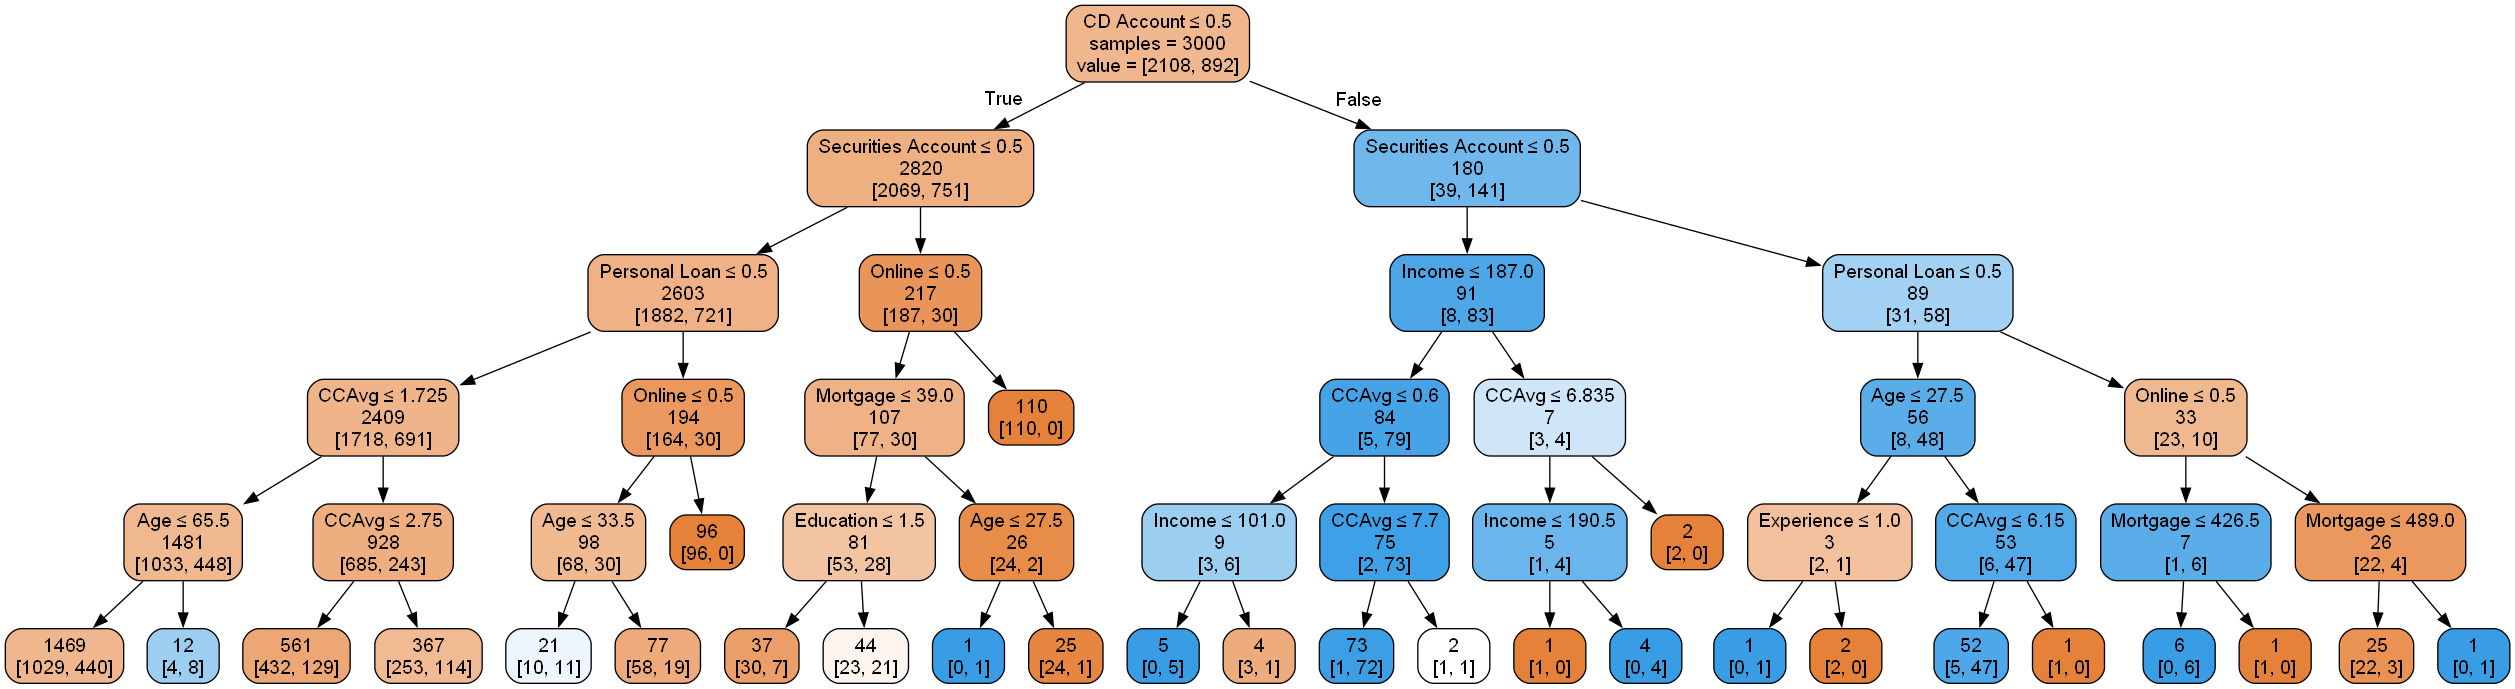

In [31]:
# Display classification tree for training partition.
print('Small Classification Tree with Control Parameters')
plotDecisionTree(classTreeBank, feature_names=train_X.columns)

# 

## question 1 ends

## question 2 starts ##

In [29]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary


In [30]:
#load the dataset
ebay_df = pd.read_csv('eBayAuctions.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'eBayAuctions.csv'

In [ ]:
ebay_df.head()

In [ ]:
ebay_df.shape

In [ ]:
ebay_df.columns

In [ ]:
ebay_df.dtypes

## using all predictors to create the classification tree, coding the text categories into numbers 

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Extracting all columns except 'Competitive?'
numerical_cols = ['sellerRating', 'Duration', 'ClosePrice', 'OpenPrice']
categorical_cols = ['Category', 'currency', 'endDay']
predictor_cols = numerical_cols + categorical_cols  # Define the order of columns for the final DataFrame

# Copying the dataframe with only the categorical columns
X_categorical = ebay_df[categorical_cols].copy()

# Initialize the ordinal encoder
ordinal_encoder = OrdinalEncoder()

# Transform the categorical columns
X_encoded = ordinal_encoder.fit_transform(X_categorical)

# Create a DataFrame with encoded categorical columns and selected numerical columns
df_numerical = ebay_df[numerical_cols]
df_final = pd.concat([df_numerical, pd.DataFrame(X_encoded, columns=categorical_cols)], axis=1)

# Add 'Competitive?' column to the end
df_final['Competitive?'] = ebay_df['Competitive?']

# Rearrange columns to place 'Competitive?' at the end
df_final = df_final[predictor_cols + ['Competitive?']]

df_final.head(5)


## Seeing how the categories are coded 

In [ ]:
# Access the categories and their respective encoded values
encoded_categories = ordinal_encoder.categories_
for i, col in enumerate(categorical_cols):
    print(f"Column '{col}' categories and encoded values:")
    for j, category in enumerate(encoded_categories[i]):
        print(f"Category '{category}' is encoded as {j}")
    print()

In [ ]:
df_final.columns

In [ ]:
df_final['Category'] = df_final['Category'].astype('category')
df_final['currency'] = df_final['currency'].astype('category')
df_final['endDay'] = df_final['endDay'].astype('category')
df_final.dtypes

## partitiong the data

In [ ]:
#Separate X and y variables
predictors =['sellerRating', 'Duration', 'ClosePrice', 'OpenPrice', 'Category','currency', 'endDay']
outcome = 'Competitive?'

#Partition
X = df_final[predictors]
y = df_final[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

## creating the tree with maxdepth = 7 and min_samples_split =50

In [ ]:
classTree1 = DecisionTreeClassifier(random_state=0, max_depth=7,min_samples_split=50)
classTree1.fit(train_X, train_y) #First one is X (predictors) and the second one is Y (target)
classificationSummary(train_y, classTree1.predict(train_X))

## testing the tree on validation data 

In [ ]:
classificationSummary(valid_y, classTree1.predict(valid_X))

## plotting decision on training data

In [ ]:
plotDecisionTree(classTree1, feature_names=train_X.columns, class_names=classTree1.classes_)
#the tree looks small here, i saved the image and viewed it separately, its readable this way

## observation
1. the overall accuracy on the validation data is 83.4 %
2. the accuracy of true positives is 349/(87+349) = 80.04 % (We are able to predict if the auction would be competive or not by 80% accuracy)

## new auction - we will not know the closing price, thus removing it from our predictors

In [ ]:
#Separate X and y variables
predictors =['sellerRating', 'Duration', 'OpenPrice', 'Category','currency', 'endDay']
outcome = 'Competitive?'

#Partition
X = df_final[predictors]
y = df_final[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

## creating the tree with maxdepth = 7 and min_samples_split =50¶

In [ ]:
classTree2 = DecisionTreeClassifier(random_state=0, max_depth=7,min_samples_split=50)
classTree2.fit(train_X, train_y) #First one is X (predictors) and the second one is Y (target)
classificationSummary(train_y, classTree2.predict(train_X))

## testing the tree on validation data (new auction)

In [ ]:
classificationSummary(valid_y, classTree2.predict(valid_X))

In [ ]:
plotDecisionTree(classTree2, feature_names=train_X.columns, class_names=classTree2.classes_)
#the tree looks small here, i saved the image and viewed it separately, its readable this way

## Note: The overall accuracy dropped from 83% to 70% without the closingPrice variable.

## question 2 ends